In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import glob
from collections import Counter
import matplotlib
import scipy

In [2]:
model = tf.keras.models.load_model( 'model12_450_调过拟合.h5' )

In [3]:
# 读取图片：3通道
def read_image(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img, channels = 3)
    return img

In [4]:
# 用当前模型测试一张图：
img_test = glob.glob( r'D:/SGDownload\611_早上/未命名(2)/未命名(2)_大图/待处理png图/subimg_551.png' )
# 从路径读取图像：
tmp = read_image( img_test[0] )
# 拓展一维：变成“批次”形式！
tmp = tf.cast(tmp, tf.float32) / 127.5 - 1  # 归到[-1,1]之间！—— 和输入数据一致！
tmp = tf.expand_dims( tmp, axis = 0 )
# 标签预测：
label_pred = model.predict(tmp)
label_pred = tf.argmax( label_pred, axis = -1 )  # 每个维度上，取一个最大值！
# 恢复原形：
tmp = tf.squeeze( tmp, axis = 0 )

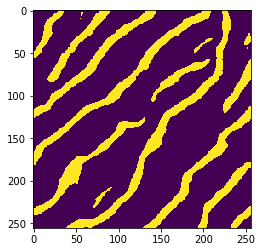

In [8]:
path = 'D:/SGDownload/画神经网络工具/PlotNeuralNet-master/examples/Unet/'
# 展示：
# plt.subplot(1,2,1)
# plt.imshow( (tmp.numpy() + 1)/2 )
# plt.subplot(1,2,2)
pred_img = label_pred.numpy().reshape(256,256)
plt.imshow( pred_img )

plt.imsave(path + 'subimg_{}.png', pred_img)

In [6]:
# 查看中间：

# 所有的层：
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_1_1 (Conv2D)             (None, 256, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
dropout_1_1 (Dropout)           (None, 256, 256, 64) 0           conv2d_1_1[0][0]                 
__________________________________________________________________________________________________
bn_1_1 (BatchNormalization)     (None, 256, 256, 64) 256         dropout_1_1[0][0]                
______________________________________________________________________________________________

In [7]:
sub_model = tf.keras.models.Model( inputs = model.input, outputs = model.get_layer('conv2d_1_2').output )

In [8]:
sub_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_1_1 (Conv2D)          (None, 256, 256, 64)      1792      
_________________________________________________________________
dropout_1_1 (Dropout)        (None, 256, 256, 64)      0         
_________________________________________________________________
bn_1_1 (BatchNormalization)  (None, 256, 256, 64)      256       
_________________________________________________________________
conv2d_1_2 (Conv2D)          (None, 256, 256, 64)      36928     
Total params: 38,976
Trainable params: 38,848
Non-trainable params: 128
_________________________________________________________________


In [52]:
# 用当前模型测试一张图：
img_test = glob.glob( r'D:/SGDownload\611_早上/未命名(2)/未命名(2)_大图/待处理png图/subimg_60.png' )
# 从路径读取图像：
tmp1 = read_image( img_test[0] )
# 拓展一维：变成“批次”形式！
tmp1 = tf.cast(tmp1, tf.float32) / 127.5 - 1  # 归到[-1,1]之间！—— 和输入数据一致！
tmp1 = tf.expand_dims( tmp1, axis = 0 )
# 标签预测：
label1 = sub_model.predict(tmp1)
label1 = np.squeeze(label1, 0)
label1.shape

(256, 256, 64)

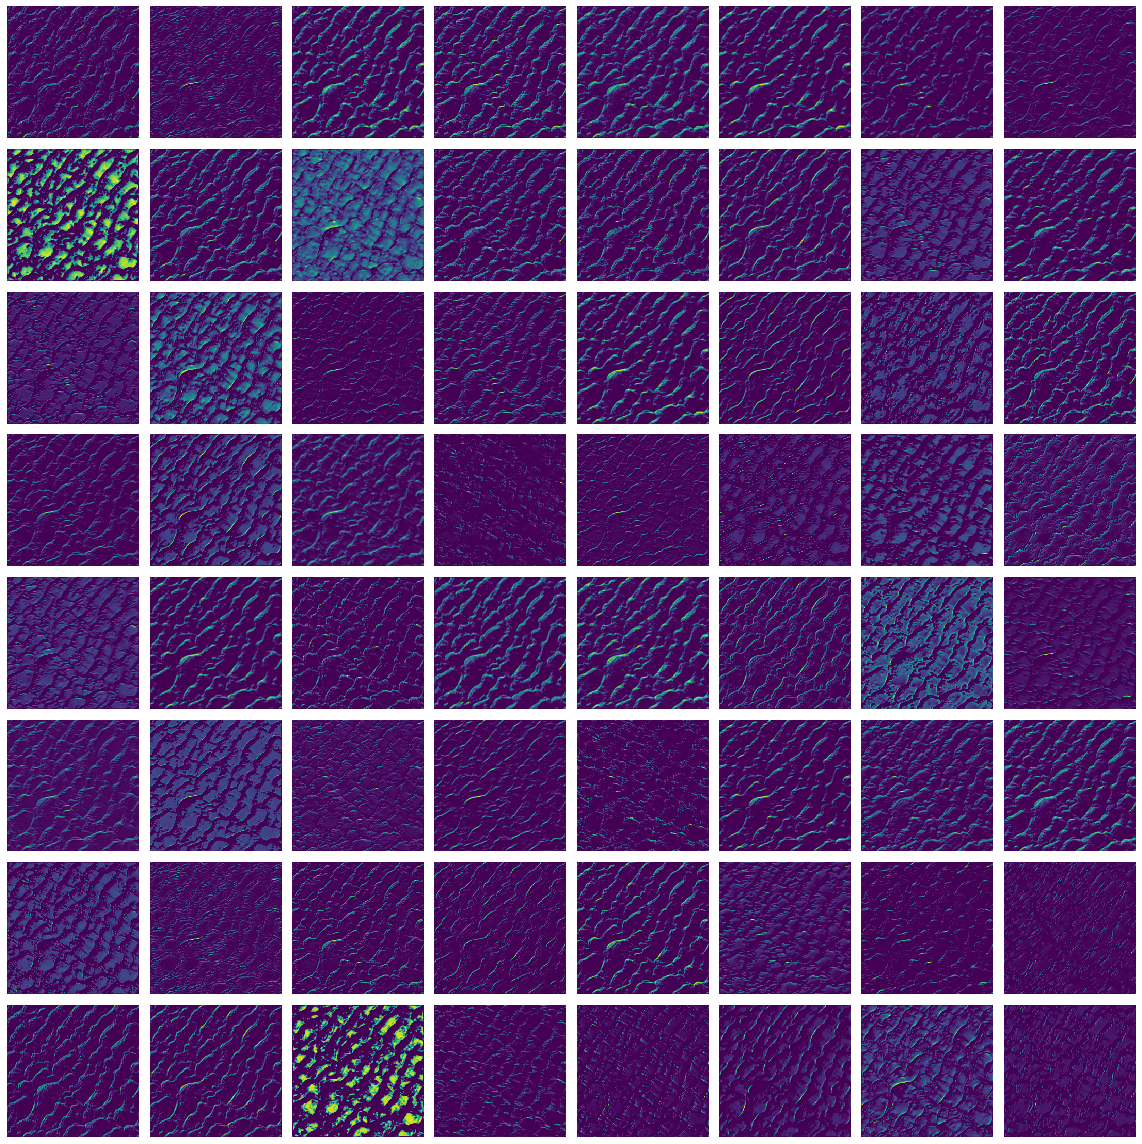

In [53]:
# 绘图展示：
plt.figure( figsize = (16,16) )
for x in range(0,64):
    ax = plt.subplot(8, 8, x+1)
    label_tmp = label1[:,:,x]
    plt.imshow( label_tmp.reshape(256,256) )
    
    # 去除坐标轴
    plt.xticks([])
    plt.yticks([])
    # 去除黑框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False) 

plt.tight_layout()
plt.savefig('submodel1.jpg')

In [54]:
sub_model2 = tf.keras.models.Model( inputs = model.input, outputs = model.get_layer('conv2d_x10_2').output )  

# 用当前模型测试一张图：
img_test = glob.glob( r'D:/SGDownload\611_早上/未命名(2)/未命名(2)_大图/待处理png图/subimg_60.png' )
# 从路径读取图像：
tmp2 = read_image( img_test[0] )
# 拓展一维：变成“批次”形式！
tmp2 = tf.cast(tmp2, tf.float32) / 127.5 - 1  # 归到[-1,1]之间！—— 和输入数据一致！
tmp2 = tf.expand_dims( tmp2, axis = 0 )
# 标签预测：
label2 = sub_model2.predict(tmp2)
label2 = np.squeeze(label2, 0)
label2.shape

(256, 256, 64)

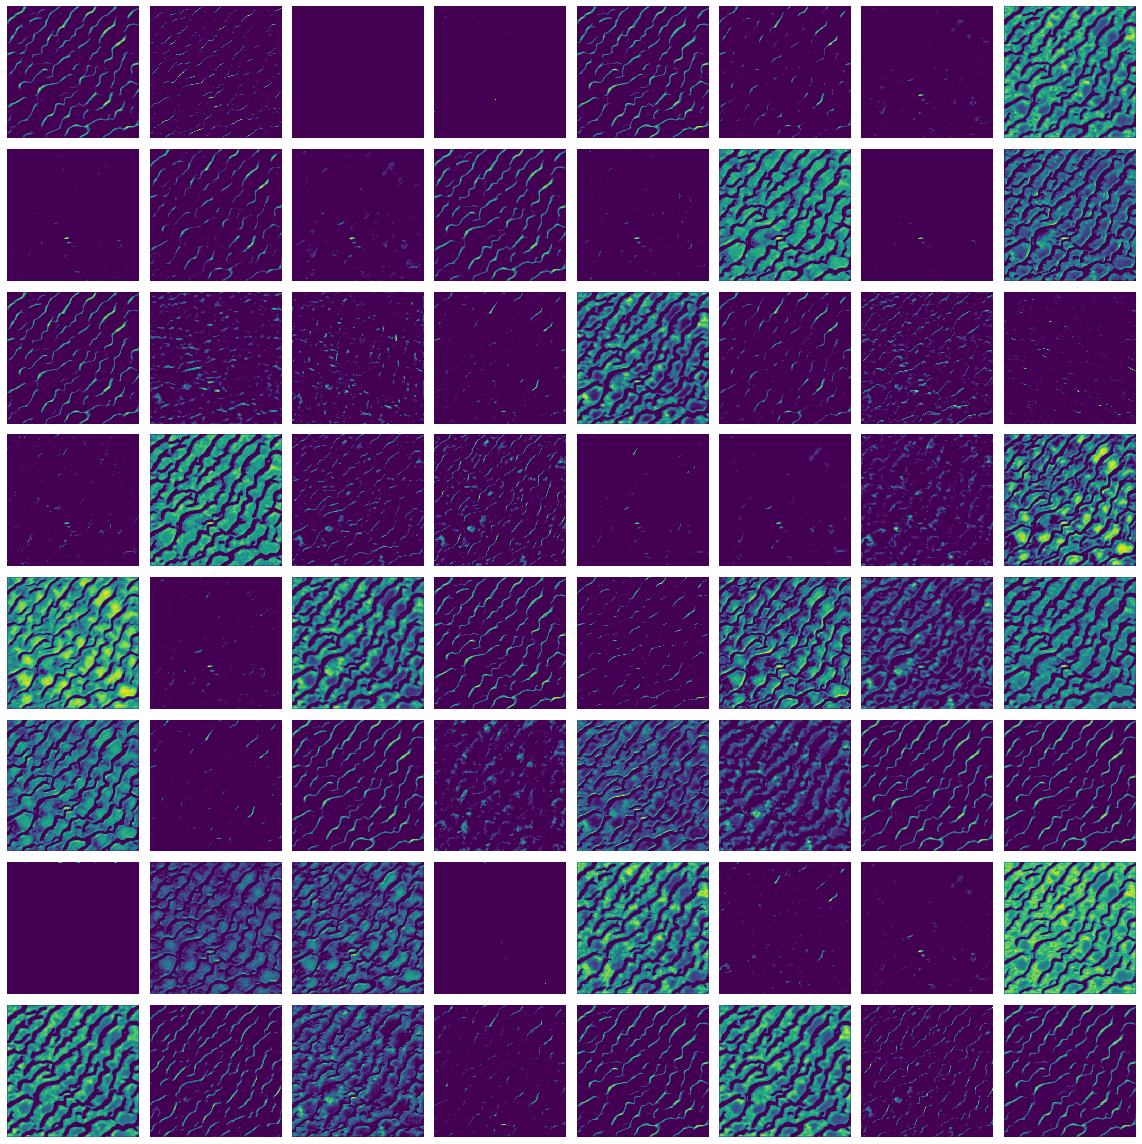

In [56]:
# 绘图展示：
plt.figure( figsize = (16,16) )
for x in range(0,64):
    ax = plt.subplot(8, 8, x+1)
    label_tmp = label2[:,:,x]
    plt.imshow( label_tmp.reshape(256,256) )
    
    # 去除坐标轴
    plt.xticks([])
    plt.yticks([])
    # 去除黑框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False) 

plt.tight_layout()
plt.savefig('submodel2.jpg')

In [77]:
label2_tmp = label2

In [79]:
list2 = [1,2,3,5,6,8,10,12,14,17,18,19,21,22,23,24,26,27,28,29,30,33,36,41,48,51,53,54,59,62]
list1 = [0,2,3,5,6,8,9,10,11,12,13,14,15,16,17,19,20,21,22,23,25,33,35,36,38,47,48,55,56,59]
total = len(list2)

for x in range( total ):
    label2_tmp[:,:,list2[x]] = label1[:,:,list1[x]]

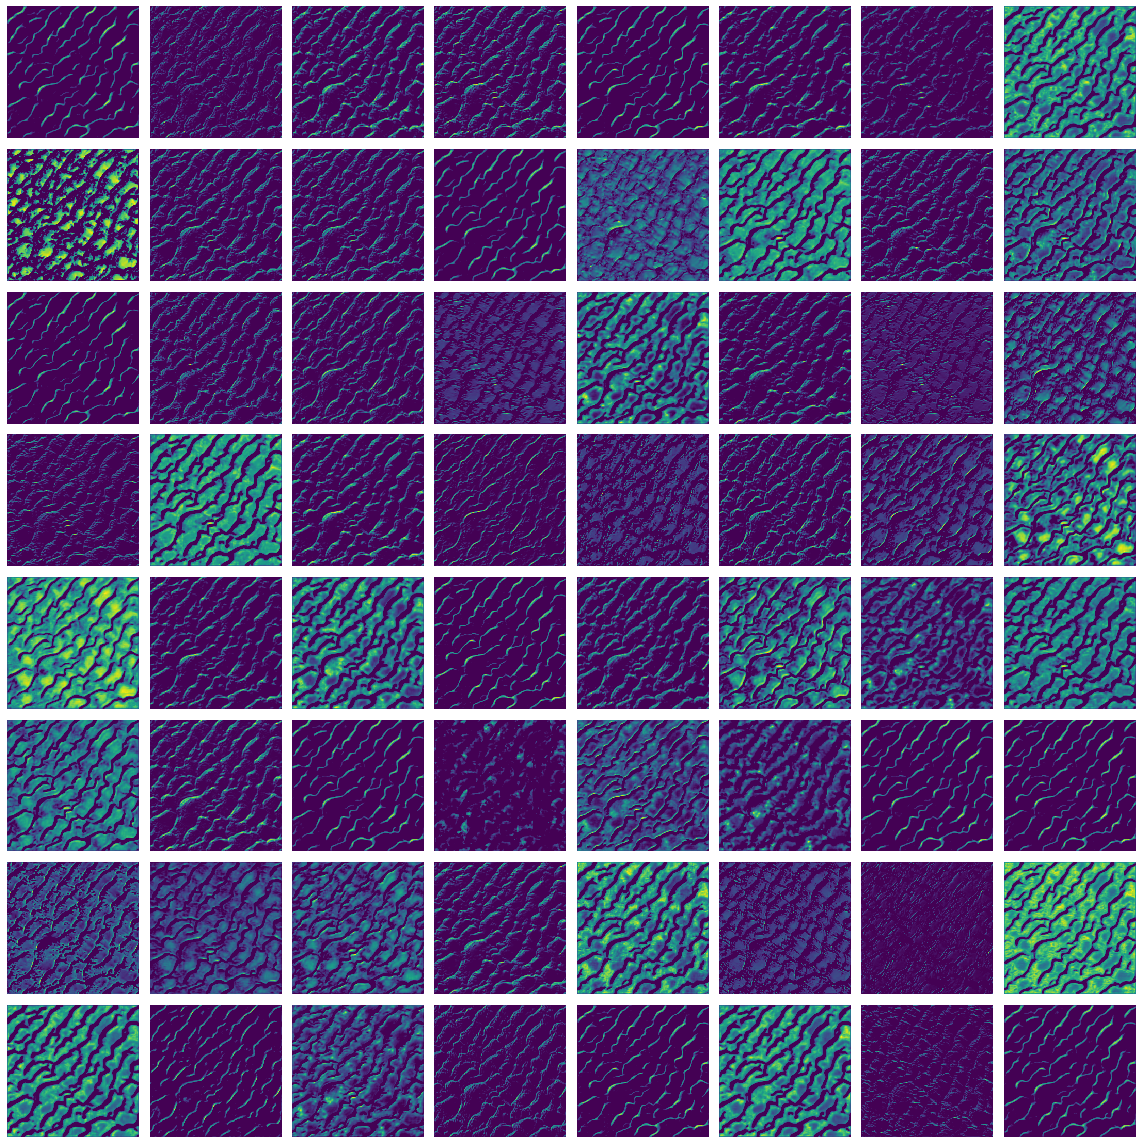

In [81]:
# 绘图展示：
plt.figure( figsize = (16,16) )
for x in range(0,64):
    ax = plt.subplot(8, 8, x+1)
    label_tmp = label2_tmp[:,:,x]
    plt.imshow( label_tmp.reshape(256,256) )
    
    # 去除坐标轴
    plt.xticks([])
    plt.yticks([])
    # 去除黑框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False) 

plt.tight_layout()
plt.savefig('submodel_end.jpg')

In [109]:
css = model.get_layer('conv2d_1_1').get_weights()

In [110]:
len(css)

2

In [117]:
# 所有的卷积核：64个
css1 = css[0]
css1.shape,type(css1)

((3, 3, 3, 64), numpy.ndarray)

In [118]:
css1_1 = css1[:,:,:,0]
css1_1

array([[[ 0.07278805, -0.02773886,  0.00090645],
        [ 0.00616201,  0.0493045 ,  0.09584951],
        [ 0.03114345, -0.15490085, -0.00721605]],

       [[ 0.15069817,  0.01782583,  0.0167292 ],
        [ 0.04765529,  0.0310829 ,  0.20920704],
        [ 0.00184333, -0.09529579,  0.04455388]],

       [[ 0.09400825, -0.03355229,  0.04949141],
        [ 0.039369  ,  0.00072069,  0.10736698],
        [ 0.02848012, -0.16586785,  0.0236699 ]]], dtype=float32)

In [116]:
# 每一个卷积核的偏置：共64个
css2 = css[1]
css2.shape,type(css2)

((64,), numpy.ndarray)

In [119]:
# model是我保存好的模型；cond2d_1_1是模型中的一个卷积层的名字
layer_tmp1 = model.get_layer('conv2d_1_1').get_weights()  # 获取权重
len(layer_tmp1)  # 是一个List：第一个元素是所有的卷积核；第二个元素是每个卷积核对应的偏置

2

In [120]:
# 获取卷积核：共64个（我模型中之前设定好的）
kernel = layer_tmp1[0]
kernel.shape, type(kernel)

((3, 3, 3, 64), numpy.ndarray)

In [123]:
# 获取每个卷积核对应的偏置：共64个 —— 64个卷积核，即64个偏置
bias = layer_tmp1[1]
bias.shape, type(bias)

((64,), numpy.ndarray)

In [ ]:
tf.keras.layers.Conv2DTranspose()